<a href="https://colab.research.google.com/github/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Laboratorios/Laboratorio_07_nn_zeroV1_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import scipy as sc
import numpy as np
import h5py
import matplotlib.pylab as plt

In [2]:
#  se debe subir de nuevo la data para poder que funcione
data_train= "/content/train_catvnoncat.h5"
train_dataset = h5py.File(data_train, "r")

data_test= "/content/test_catvnoncat.h5"
test_dataset = h5py.File(data_test, "r")


In [3]:
train_dataset.keys()

<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>

In [4]:
# Read the data
xtrain_classes, xtrain, train_label =\
train_dataset["list_classes"],train_dataset["train_set_x"],train_dataset["train_set_y"]

test_classes, xtest,test_label =\
test_dataset["list_classes"],test_dataset["test_set_x"],test_dataset["test_set_y"]


In [5]:
np.shape(xtrain)

(209, 64, 64, 3)

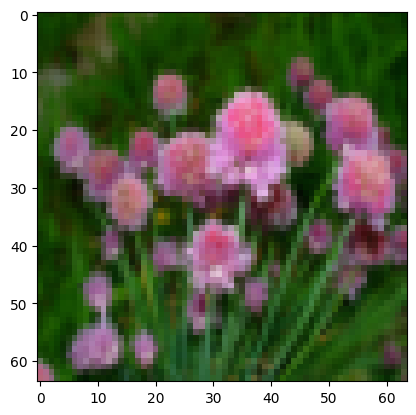

In [6]:
plt.imshow(xtrain[21])

In [7]:
np.shape(xtrain[0])

(64, 64, 3)

In [8]:
np.reshape(xtrain[0], 64*64*3)

array([17, 31, 56, ...,  0,  0,  0], dtype=uint8)

In [9]:
xtrain_= np.reshape(xtrain,(209, 64*64*3))/255
xtest_ = np.reshape(xtest,(50, 64*64*3))/255

In [10]:
len(xtrain_[0])

12288

In [11]:
64*64*3

12288

Construyamos una red neuronal con una capa de entrada, una capa de salida con una red y L-1 redes ocultas.

# Con m datos de entrenamientos.

Para $m$ datos de entrenamiento, las expresión anteriores pueden ser resumidas en las siguientes ecuaciones



\begin{equation}
\begin{bmatrix}
z_1^{(0)}  &z_1^{(1)} & .&.& .&z_1^{(m)}\\
z_2^{(0)}  &z_2^{(1)} &. &.&  .&z_2^{(m)}\\
.          & .        &. & &   &.      \\
.          & .        &  &. &   &.      \\
.          & .        &  &  & .&      \\
z_{n^{[l]}}^{(0)}&z_{n^{[l]}}^{(1)} & . & .& .& z_{n^{[l]}}^{(m)}        \\
\end{bmatrix}^{[l]}=
\begin{bmatrix}
\theta_{11} & \theta_{12} & . & .& .& \theta_{1n^{[l-1]}}\\
\theta_{21} & \theta_{22} & . & .& .& \theta_{2n^{[l-1]}}\\
. & .  & . &   & & .\\
. & .  &   & . & & .\\
. & .  &   &  & .& .\\
\theta_{n^{[l]}1} & \theta_{n^{[l]}2} & . & .& .& \theta_{n^{[l]}n^{[l-1]}}\\
\end{bmatrix}^{[l]}_{n^{[l]} \times n^{[l-1]}}
\begin{bmatrix}
a_1^{(0)}  &a_1^{(1)} & .&.& .&a_1^{(m)}\\
a_2^{(0)}  &a_2^{(1)} &. &.&  .&a_2^{(m)}\\
.          & .        &. & &   &.      \\
.          & .        &  &. &   &.      \\
.          & .        &  &  & .&      \\
a_{n^{[L-1]}}^{(0)}&a_{n^{[L-1]}}^{(1)} & . & .& .& a_{n^{[L-1]}}^{(m)}        \\
\end{bmatrix}^{[l-1]} +
\begin{bmatrix}
b_1 \\
b_2 \\
. \\
. \\
. \\
b_{n^{[l]}}\\
\end{bmatrix}^{[l]}
\end{equation}


Escrito de una formas mas compacta tenemos que:


\begin{equation}
[ \vec{Z}^{[l](0)},\vec{Z}^{[l](1)},...,\vec{Z}^{[l](m)}  ]= \Theta^{[l]} [\vec{A}^{[l-1](0)},\vec{A}^{[l-1](1)},...,\vec{A}^{[l-1](m)} ]+ \vec{b}^{[l]}
\end{equation}

Aplicando la funcion de activación:

\begin{equation}
[\vec{A}^{[l](0)},\vec{A}^{[l](1)},...,\vec{A}^{[l](m)} ]=f([\vec{Z}^{[l](0)},\vec{Z}^{[l](1)},...,\vec{Z}^{[l](m)}  ])
\end{equation}

Las dimensiones de las expresiones anteriores, pueden ser resumidas en lo siguiente:

$\mathrm{dim(\vec{\cal{Z}}^{[l]})}=n^{[l]}\times m $

$\mathrm{dim(\vec{\Theta}^{[l]})}=n^{[l]}\times n^{[l-1]}$

$\mathrm{dim(\vec{\cal{A}}^{[l]})}=n^{[l-1]}\times m $

$\mathrm{dim(\vec{b}^{[l]})}=n^{[l]}$




## Topología de la red.

1. Construir un clase  que permita definir una red neuronal con la topología
deseada y la función de activación para cada capa, para ello deberá construir una funcion Topology con el número de capas de la red neuronal :

Topology = [n_x, n_h1, n_h2, n_h3, ...,n_y]

En este caso:
- $n^{[0]}=n_x$ seran los valores de entradas de la capa de entrada
- $n^{[1]}=n_{h1}$ Primera capa oculta de la red neuronal
- $n^{[2]}=n_{h2}$ Segunda capa oculta de la red neuronal

.

.

.


- $n^{[l]}=n_{hl}$ Segunda capa oculta de la red neuronal
.

.

.

- $n^{[L]}=n_{y}$ Segunda capa oculta de la red neuronal

donde

- $\mathrm{n_x}$: valores de entrada
- $\mathrm{n_{h1}}$: hidden layer 1
- $\mathrm{n_{h2}}$: hidden layer 2
- $\mathrm{n_y}$: last layer

- $n^{[L]}=n_{y}$ Segunda capa oculta de la red neuronal


También definir una lista con las funciones de activaciones para cada capa.


activation=[None, relu, relu, relu, ...,sigmoid]

  


a. Cada unas de las capas deberá tener los parámetros de inicialización de manera aleatoria:


La matriz de parametros para cada capa debera tener:


$\mathrm{dim(\vec{b}^{[l]})}=n^{[l]}$

$\mathrm{dim(\vec{\Theta}^{[l]})}=n^{[l]}\times n^{[l-1]}$

Lo anteriores parametros deberán estar en el constructor de la clase.


b. Construya un metodo llamado output cuya salida serán los valores de Z y A


$\mathrm{dim(\vec{\cal{A}}^{[l]})}=n^{[l-1]}\times m $

$\mathrm{dim(\vec{\cal{Z}}^{[l]})}=n^{[l]}\times m $.



Se sugiere para cada capa emplear programación orientada a objetos definida de la siguiente manera:

```
class layer_nn():
  def __init__(self, act_fun, nlayer_present, nlayer_before):
    self.theta = 2*np.random.random((nlayer_present, nlayer_before)) - 1
    self.B = 2*np.random.random((nlayer_present,1)) - 1
    self.act_fun = act_fun

  def output(self, Z, A):
    self.Z = Z
    self.A = A



def act_function(x, activation):
  if activation=="sigmoid":
    f = lambda x: 1/(1+np.exp(-x))
    fp = f(x)*(1-f(x))
    return f, fp
  
  elif activation == "tanh":
    f = lambda x: np.tanh
    return tanh
  else :
    return 0
```
    

2. Construir un generalizacion de la red, en el que entrada el valor inicial
y la red neuronal completa arroje la salida y la actualizacion de la red con los parametros deseados:

  ```
  A, nn = forward_pass(A0, nn_red)

 ```
3. Encontrar la funcion de coste.


$$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) \tag{7}$$


4. Construir un codigo que permita realizar el BackwardPropagation


# Backward Propagation

Para una capa $l$ arbitraria tenemos que:

- \begin{equation}
d\Theta^{[l]} =  d{\cal Z}^{(i)[l]} Trans(A)^{(i)[l-1]} = dA^{(i)[l]} f'({\cal Z}^{(i)[l]} ) Trans(A)^{(i)[l-1]}
\end{equation}

- \begin{equation}
db^{[l]} =  d{\cal Z}^{(i)[L]}  = dA^{(i)[l]} f'({\cal Z}^{(i)[l]} )
\end{equation}
```
db_L =  m_*np.sum(dZ, axis=1, keepdims=True)
```
Los valores de dA pueden ser escritos como:
- \begin{equation}
dA^{(i)[l-1]} = \Theta^{l} \cdot dZ^{(i)[l]}
\end{equation}





$ dZ^{[l]} = dA^{[l]} * f'^{[l]} (Z^{[l]}) $
$ d\Theta^{[l]} = \frac{\partial \mathcal{J} }{\partial \Theta^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} \tag{1}$
$ db^{[l]} = \frac{\partial \mathcal{J} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}\tag{2}$
$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = \theta^{[l] T} dZ^{[l]} \tag{3}$


Para la capa L esima:

```
dAL = -(np.divide(Y, A) - np.divide(1 - Y, 1 - A))
```

# Aplicacion gradiente descendente

$$ \Theta^{[l]} = \Theta^{[l]} - \alpha \text{ } d\Theta^{[l]} \tag{16}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{17}$$


#Respuesta

## Topología de la red.

1. Construir un clase  que permita definir una red neuronal con la topología
deseada y la función de activación para cada capa, para ello deberá construir una funcion Topology con el número de capas de la red neuronal :

Topology = [n_x, n_h1, n_h2, n_h3, ...,n_y]

En este caso:
- $n^{[0]}=n_x$ seran los valores de entradas de la capa de entrada
- $n^{[1]}=n_{h1}$ Primera capa oculta de la red neuronal
- $n^{[2]}=n_{h2}$ Segunda capa oculta de la red neuronal

.

.

.


- $n^{[l]}=n_{hl}$ Segunda capa oculta de la red neuronal
.

.

.

- $n^{[L]}=n_{y}$ Segunda capa oculta de la red neuronal

donde

- $\mathrm{n_x}$: valores de entrada
- $\mathrm{n_{h1}}$: hidden layer 1
- $\mathrm{n_{h2}}$: hidden layer 2
- $\mathrm{n_y}$: last layer

- $n^{[L]}=n_{y}$ Segunda capa oculta de la red neuronal


También definir una lista con las funciones de activaciones para cada capa.


activation=[None, relu, relu, relu, ...,sigmoid]

  


a. Cada unas de las capas deberá tener los parámetros de inicialización de manera aleatoria:


La matriz de parametros para cada capa debera tener:


$\mathrm{dim(\vec{b}^{[l]})}=n^{[l]}$

$\mathrm{dim(\vec{\Theta}^{[l]})}=n^{[l]}\times n^{[l-1]}$

Lo anteriores parametros deberán estar en el constructor de la clase.

b. Construya un metodo llamado output cuya salida serán los valores de Z y A


$\mathrm{dim(\vec{\cal{A}}^{[l]})}=n^{[l-1]}\times m $

$\mathrm{dim(\vec{\cal{Z}}^{[l]})}=n^{[l]}\times m $.



Se sugiere para cada capa emplear programación orientada a objetos definida de la siguiente manera:

```
class layer_nn():
  def __init__(self, act_fun, nlayer_present, nlayer_before):
    self.theta = 2*np.random.random((nlayer_present, nlayer_before)) - 1
    self.B = 2*np.random.random((nlayer_present,1)) - 1
    self.act_fun = act_fun

  def output(self, Z, A):
    self.Z = Z
    self.A = A



def act_function(x, activation):
  if activation=="sigmoid":
    f = lambda x: 1/(1+np.exp(-x))
    fp = f(x)*(1-f(x))
    return f, fp
  
  elif activation == "tanh":
    f = lambda x: np.tanh
    return tanh
  else :
    return 0
```

In [12]:
import numpy as np
import sympy as sp

In [13]:
m = 2*np.random.random((2, 2)) - 1
sp.Matrix(m)

Matrix([
[  0.63885247234907, 0.379939222951023],
[-0.191740463103376, 0.499300048000734]])

In [14]:
class layer_nn(): # objeto de la red neuronal
  def __init__(self, func_act, nn_present, nn_before): # inicializar
    np.random.seed(0) # se mantiene una semilla para la aleatoriedad
    # Definicion de las componentes, los pesos y el bias de forma aleatoria
    self.theta = 2*np.random.random((nn_present, nn_before)) - 1
    self.b = 2*np.random.random((nn_present, 1)) - 1
    self.func_acti = func_act

  def output(self, A, Z):
    # valores de salida, de la funcion
    self.A = A
    self.Z = Z


def activation_function(name, x):
  # funcion de activacion sigmoide, que se usa con los valores de z
  if (name=="sigmoid"):
    f = lambda x: 1/(1+np.exp(-x)) # funcion sigmoide
    return f(x)

  elif (name=="tanh"): # funcion de activacion tanh
    f =  lambda x: np.tanh(x)
    return f(x)
  else :
    return 0


In [15]:
# Numero de valores que trataremos en las imagenes
nx = 64 * 64 * 3
# La topologia de la red neuronal, como se especifica en el ejercicio
# La entrada debe ser una neurona para cada valor que se entregara , y la salida es solo una
Topology = [nx, 3, 4, 7, 1 ]
"""
COMENTARIO. si bien el ejercicio dice que debemos utilizar la siguiente
lista como funciones de activacion:
[None, relu, relu, relu, ...,sigmoid]
Ocurren una serie de errores por la las funciones que nos dice que usmeos el ejercicio
por esto se decide usar solo funciones sigmooid
"""
# Funciones de activacion para cada capa
activation=["sigmoid", "sigmoid", "sigmoid", "sigmoid"]
# Capas de la red neuronal con sus respectivas funciones de activacion
l1 = layer_nn(activation[0], 3, Topology[0])
l2 = layer_nn(activation[1], 4, Topology[1])
l3 = layer_nn(activation[2], 7, Topology[2])
l4 = layer_nn(activation[3], 1, Topology[3])
# La red entera
red_nn = [l1, l2, l3, l4]

In [16]:

# l1 = layer_nn("sigmoid", 3, nx)
# l2 = layer_nn("sigmoid", 4, 3)
# l3 = layer_nn("sigmoid", 7, 4)
# l4 = layer_nn("sigmoid",1, 7)


In [17]:
# Capas
# Valores iniciales
A0 = xtrain_.T
Z1 = l1.theta@A0 + l1.b
A1 = activation_function(l1.func_acti, Z1)

Z2 = l2.theta@A1 + l2.b
A2 = activation_function(l2.func_acti, Z2)

Z3 = l3.theta@A2 + l3.b
A3 = activation_function(l3.func_acti, Z3)

Z4 = l4.theta@A3 + l4.b
A4 = activation_function(l4.func_acti, Z4)

2. Construir un generalizacion de la red, en el que entrada el valor inicial
y la red neuronal completa arroje la salida y la actualizacion de la red con los parametros deseados:

  ```
  A, nn = forward_pass(A0, nn_red)

 ```

In [18]:
import numpy as np
import sympy as sp
class layer_nn():
  # clase de capas
  def __init__(self, func_act, nn_present, nn_before):
    np.random.seed(0)
    self.theta = 2*np.random.random((nn_present, nn_before)) - 1
    self.b = 2*np.random.random((nn_present, 1))-1
    self.func_acti = func_act

  def output(self, A, Ap, Z):
    self.A = A
    self.Z = Z
    self.Ap = Ap

  def derivative(self,dtheta, db ):
    self.dtheta = dtheta
    self.db = db

def activation_function(name, x):
  if (name=="sigmoid"):
    f = lambda x: 1/(1+np.exp(-x))
    return f(x), f(x)

  elif (name=="tanh"):
    f =  lambda x: np.tanh(x)
    return f(x)
  else :
    return "Error"

def build_red(Topology, act_func):
  # Construye la red neuronal
  L = len(Topology)
  red_nn=[]
  for i in range(1, L):
    # crecion de objetos, cada capa
    li = layer_nn(act_func[i], Topology[i], Topology[i-1] )
    # se agrega la capa
    red_nn.append(li)
  return red_nn

def forward_pass(A0, nn):
  update_nn = []
  for layer in nn:
    print(np.shape(layer.theta))
    li = layer
    Zi = li.theta@A0 + li.b
    Aii, Ap = activation_function(li.func_acti, Zi)
    li.output(Aii, Ap,Zi)
    update_nn.append(li)
    A0 = Aii.copy()

  return Aii, update_nn


In [19]:
nx = 64 * 64 * 3 # valores de las imagenes
Topology = [nx, 3, 4, 7, 1 ] # neuronas por capas en la red
# funciones de activacion para cada capa
act_func = ["sigmoid","sigmoid", "sigmoid", "sigmoid", "sigmoid"]
# creacion de la red neuronal
nn = build_red(Topology, act_func)
AL, update_nn = forward_pass(A0, nn)

(3, 12288)
(4, 3)
(7, 4)
(1, 7)


3. Encontrar la funcion de coste.


$$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) \tag{7}$$

In [20]:
def cost_function(A, Y):
    epsilon = 1e-10  # Evita log(0)
    A = np.clip(A, epsilon, 1 - epsilon)
    m = Y.shape[1]
    cost = (-1 / m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    return cost

Y = np.array(train_label).reshape(1, -1)
J = cost_function(AL, Y)
print(J)

1.1170832742138854


4. Construir un codigo que permita realizar el BackwardPropagation

# Backward Propagation

Para una capa $l$ arbitraria tenemos que:

- \begin{equation}
d\Theta^{[l]} =  d{\cal Z}^{(i)[l]} Trans(A)^{(i)[l-1]} = dA^{(i)[l]} f'({\cal Z}^{(i)[l]} ) Trans(A)^{(i)[l-1]}
\end{equation}

- \begin{equation}
db^{[l]} =  d{\cal Z}^{(i)[L]}  = dA^{(i)[l]} f'({\cal Z}^{(i)[l]} )
\end{equation}
```
db_L =  m_*np.sum(dZ, axis=1, keepdims=True)
```
Los valores de dA pueden ser escritos como:
- \begin{equation}
dA^{(i)[l-1]} = \Theta^{l} \cdot dZ^{(i)[l]}
\end{equation}





$ dZ^{[l]} = dA^{[l]} * f'^{[l]} (Z^{[l]}) $
$ d\Theta^{[l]} = \frac{\partial \mathcal{J} }{\partial \Theta^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} \tag{1}$
$ db^{[l]} = \frac{\partial \mathcal{J} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}\tag{2}$
$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = \theta^{[l] T} dZ^{[l]} \tag{3}$


Para la capa L esima:

```
dAL = -(np.divide(Y, A) - np.divide(1 - Y, 1 - A))
```

# Aplicacion gradiente descendente

$$ \Theta^{[l]} = \Theta^{[l]} - \alpha \text{ } d\Theta^{[l]} \tag{16}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{17}$$




# Backward Propagation

Para una capa $l$ arbitraria tenemos que:

- \begin{equation}
d\Theta^{[l]} =  d{\cal Z}^{(i)[l]} Trans(A)^{(i)[l-1]} = dA^{(i)[l]} f'({\cal Z}^{(i)[l]} ) Trans(A)^{(i)[l-1]}
\end{equation}

- \begin{equation}
db^{[l]} =  d{\cal Z}^{(i)[L]}  = dA^{(i)[l]} f'({\cal Z}^{(i)[l]} )
\end{equation}
```
db_L =  m_*np.sum(dZ, axis=1, keepdims=True)
```
Los valores de dA pueden ser escritos como:
- \begin{equation}
dA^{(i)[l-1]} = \Theta^{l} \cdot dZ^{(i)[l]}
\end{equation}





$ dZ^{[l]} = dA^{[l]} * f'^{[l]} (Z^{[l]}) $
$ d\Theta^{[l]} = \frac{\partial \mathcal{J} }{\partial \Theta^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} \tag{1}$
$ db^{[l]} = \frac{\partial \mathcal{J} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}\tag{2}$
$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = \theta^{[l] T} dZ^{[l]} \tag{3}$


Para la capa L esima:

```
dAL = -(np.divide(Y, A) - np.divide(1 - Y, 1 - A))
```

In [21]:
def backward_propagation(AL, Y, nn):
    epsilon = 1e-10
    AL = np.clip(AL, epsilon, 1 - epsilon)  # Evita divisiones por cero
    m = Y.shape[1]
    m_inv = 1 / m

    # Capa de salida
    dAL = -(np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    fp = nn[-1].Ap
    dZ = dAL * fp

    dtheta = m_inv * dZ @ nn[-2].A.T
    db = m_inv * np.sum(dZ, axis=1, keepdims=True)

    nn[-1].derivative(dtheta, db)

    # Propagar hacia atrás
    for l in reversed(range(len(nn) - 1)):
        dA = nn[l + 1].theta.T @ dZ
        fp = nn[l].Ap
        dZ = dA * fp

        if l > 0:
            dtheta = m_inv * dZ @ nn[l - 1].A.T
        else:
            dtheta = m_inv * dZ @ nn[l].A.T

        db = m_inv * np.sum(dZ, axis=1, keepdims=True)
        nn[l].derivative(dtheta, db)

    return nn

In [22]:
nn_with_gradients = backward_propagation(Y, AL, update_nn)

capa_L = nn_with_gradients[-1]
print(f"Gradiente de theta de la capa L: {capa_L.dtheta}")
print(f"Gradiente de b de la capa L: {capa_L.db}")

Gradiente de theta de la capa L: [[-2.24210423e+09 -1.92457210e+09 -1.89932734e+09 -2.34691491e+09
  -2.06195076e+09 -2.78026554e+09 -8.38252632e+08]]
Gradiente de b de la capa L: [[-3.57815879e+09]]
